In [65]:
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
kospi_200_items = pd.read_excel('./기술지표.xlsx')

In [68]:
data = kospi_200_items
data.index = data['Frequency'].values

In [69]:
data

,Frequency,RSI,Stochastic%K,Stochastic%D,williamR,MACD,20-day sma,CCI,A/D,price
2010-01-04,2010-01-04,NaN,NaN,NaN,-19.354839,NaN,111741.666667,106.892208,-0.200000,119000
2010-01-05,2010-01-05,NaN,NaN,NaN,-77.419355,NaN,112233.333333,11.713776,0.000000,110000
2010-01-06,2010-01-06,NaN,NaN,NaN,-78.571429,NaN,112583.333333,-34.013605,0.555556,111000
2010-01-07,2010-01-07,NaN,NaN,NaN,-94.117647,NaN,112700.000000,-86.883876,0.076923,106000
2010-01-08,2010-01-08,NaN,19.444444,NaN,-82.051282,NaN,112691.666667,-125.521268,0.222222,106000
2010-01-11,2010-01-11,NaN,0.000000,NaN,-100.000000,NaN,112525.000000,-145.682002,0.250000,101500
2010-01-12,2010-01-12,NaN,13.636364,11.026936,-92.682927,NaN,112208.333333,-142.585551,1.000000,103000
2010-01-13,2010-01-13,NaN,5.000000,6.212121,-97.560976,NaN,111816.666667,-134.610835,0.250000,102000
2010-01-14,2010-01-14,NaN,33.333333,17.323232,-90.243902,NaN,111575.000000,-110.088616,1.250000,103500
2010-01-15,2010-01-15,NaN,86.666667,41.666667,-68.292683,NaN,111375.000000,-59.807956,1.000000,108000


In [70]:
# number : n일이동평균 / back: 몇일 전 이동평균
def making_SMA(data,number,back=0):
    ls = pd.DataFrame(np.zeros(number+back-1))
    
    for place in list(range(len(data)))[number+back-1:]:
        sumation = data['price'][list(range(place-number-back+1,place-back+1))].mean()
        sumation = pd.Series(sumation)
        ls = ls.append(sumation,ignore_index=True)
    ls.index = data.index
    return ls

In [71]:
# number : n일이동평균 / back: 몇일 전 이동평균
def making_WMA(data,number,back=0):
    ls = pd.DataFrame(np.zeros(number+back-1))
    
    for place in list(range(len(data)))[number+back-1:]:
        sumation = data['price'][list(range(place-number-back+1,place-back+1))]
        sumation2 = (np.array(sumation) * (np.array(range(number))+1)).sum() / (np.array(range(number))+1).sum()
        
        sumation2 = pd.Series(sumation2)
        ls = ls.append(sumation2,ignore_index=True)
    ls.index = data.index
    return ls

In [72]:
# number : forward+1 수익률 / back: 몇일 전 이동평균
def making_cate_revenue(data,forward=0):
    
    the_day_price = data['price'][0:len(data)-1-forward]
    next_day_price = data['price'][forward+1:]
    
    next_day_price.index = the_day_price.index
    
    ls = the_day_price < next_day_price
    ls = ls.append(pd.DataFrame([0]))
    return ls.astype('float64')

In [73]:
def making_Momentum(data,number):
    ls = pd.DataFrame(np.zeros(number))
    
    for place in list(range(len(data)))[number:]:
        if data['price'][place]>data['price'][place-number]:
            a = 1
        else:
            a = 0
        ls = ls.append(pd.Series(a),ignore_index=True)
    ls.index = data.index
    return ls

In [74]:
data['SMA10'] = making_SMA(pd.DataFrame(data['price']),7)

In [75]:
data['WMA10'] = making_WMA(pd.DataFrame(data['price']),7)

In [76]:
data['revenue_2'] = making_cate_revenue(data)

In [77]:
data['Momentum'] = making_Momentum(data,2)

In [78]:
final_data = data[['RSI', 'Stochastic%K', 'Stochastic%D', 'williamR', 'MACD',
       'CCI', 'A/D', 'SMA10', 'WMA10','Momentum','price','revenue_2']]

In [79]:
final_data.to_excel('./dataset.xlsx',encoding='utf-8')

In [80]:
simple = final_data[20:-1]
simple

,RSI,Stochastic%K,Stochastic%D,williamR,MACD,CCI,A/D,SMA10,WMA10,Momentum,price,revenue_2
2010-02-01,49.862747,92.307692,84.927961,-6.451613,110520.718318,171.613600,1.600000,111500.000000,112517.857143,1.0,116000,0.0
2010-02-02,44.442373,58.333333,74.213675,-33.333333,110748.300115,110.451520,0.000000,111857.142857,112642.857143,0.0,112000,0.0
2010-02-03,44.442373,28.571429,59.737485,-33.333333,110940.869328,88.050314,0.555556,112000.000000,112678.571429,0.0,112000,1.0
2010-02-04,50.662504,80.000000,55.634921,-9.677419,111719.197124,130.587409,1.100000,113071.428571,113678.571429,1.0,116000,0.0
2010-02-05,49.910291,73.333333,60.634921,-12.903226,112300.859105,98.555903,-0.142857,114000.000000,114285.714286,1.0,115500,1.0
2010-02-08,50.698603,80.000000,77.777778,-9.677419,112869.957704,110.535406,0.571429,114357.142857,114785.714286,0.0,116000,1.0
2010-02-09,51.520267,86.666667,80.000000,-6.666667,113428.425750,102.087833,0.428571,114857.142857,115321.428571,1.0,116500,0.0
2010-02-10,47.277544,36.363636,67.676768,-25.925926,113516.360250,79.521674,0.285714,114571.428571,115107.142857,0.0,114000,1.0
2010-02-11,50.770301,72.727273,65.252525,-11.111111,113898.458673,87.024451,1.166667,115142.857143,115464.285714,0.0,116000,0.0
2010-02-12,50.770301,57.142857,55.411255,-11.111111,114221.772723,80.371438,0.500000,115714.285714,115678.571429,1.0,116000,1.0


## 논문대로 전처리과정

In [81]:
final_data

,RSI,Stochastic%K,Stochastic%D,williamR,MACD,CCI,A/D,SMA10,WMA10,Momentum,price,revenue_2
2010-01-04,NaN,NaN,NaN,-19.354839,NaN,106.892208,-0.200000,0.000000,0.000000,0.0,119000,0.0
2010-01-05,NaN,NaN,NaN,-77.419355,NaN,11.713776,0.000000,0.000000,0.000000,0.0,110000,1.0
2010-01-06,NaN,NaN,NaN,-78.571429,NaN,-34.013605,0.555556,0.000000,0.000000,0.0,111000,0.0
2010-01-07,NaN,NaN,NaN,-94.117647,NaN,-86.883876,0.076923,0.000000,0.000000,0.0,106000,0.0
2010-01-08,NaN,19.444444,NaN,-82.051282,NaN,-125.521268,0.222222,0.000000,0.000000,0.0,106000,0.0
2010-01-11,NaN,0.000000,NaN,-100.000000,NaN,-145.682002,0.250000,0.000000,0.000000,0.0,101500,1.0
2010-01-12,NaN,13.636364,11.026936,-92.682927,NaN,-142.585551,1.000000,108071.428571,105571.428571,0.0,103000,0.0
2010-01-13,NaN,5.000000,6.212121,-97.560976,NaN,-134.610835,0.250000,105642.857143,104053.571429,1.0,102000,1.0
2010-01-14,NaN,33.333333,17.323232,-90.243902,NaN,-110.088616,1.250000,104714.285714,103517.857143,1.0,103500,1.0
2010-01-15,NaN,86.666667,41.666667,-68.292683,NaN,-59.807956,1.000000,104285.714286,104339.285714,1.0,108000,0.0


In [82]:
preprocessing = pd.DataFrame([],index=final_data.index)

In [83]:
a = final_data['SMA10'] < final_data['price']
sma10 = a.astype(np.int)

In [84]:
b = final_data['WMA10'] < final_data['price']
wma10 = b.astype(np.int)

In [85]:
Momentum = final_data['Momentum']

In [86]:
present0 = final_data['Stochastic%K'][1:]
pre0 = final_data['Stochastic%K'][:-1]
pre0.index = present0.index
c = present0 > pre0
cc = pd.concat([pd.Series([0]), c])
cc.index = final_data.index
Stochastic_K = pd.DataFrame(cc.astype(np.int))

In [87]:
present1 = final_data['Stochastic%D'][1:]
pre1 = final_data['Stochastic%D'][:-1]
pre1.index = present1.index
d = present1 > pre1
dd = pd.concat([pd.Series([0]), d])
dd.index = final_data.index
Stochastic_D = pd.DataFrame(dd.astype(np.int))

In [88]:
present2 = final_data['MACD'][1:]
pre2 = final_data['MACD'][:-1]
pre2.index = present2.index
e = present2 > pre2
ee = pd.concat([pd.Series([0]), e])
ee.index = final_data.index
MACD = pd.DataFrame(ee.astype(np.int))

In [89]:
present3 = final_data['williamR'][1:]
pre3 = final_data['williamR'][:-1]
pre3.index = present3.index
f = present3 > pre3
ff = pd.concat([pd.Series([0]), f])
ff.index = final_data.index
williamR = pd.DataFrame(ff.astype(np.int))

In [90]:
present4 = final_data['A/D'][1:]
pre4 = final_data['A/D'][:-1]
pre4.index = present4.index
g = present4 > pre4
AD = g.astype(np.int)

In [91]:
## RSI 변수
rsi = pd.DataFrame([0])
tt  = final_data['RSI']
for n in list(range(len(final_data)))[1:]:
    value = np.nan
    
    if tt[n] > 70:
        value = -1
    elif tt[n] < 30:
        value = 1
    else:
        if tt[n] > tt[n-1]:
            value = 1
        else:
            value = -1
    rsi = rsi.append(pd.DataFrame([value]))
rsi.index = final_data.index

In [92]:
## CCI
CCI = pd.DataFrame([0])
tt  = final_data['CCI']
for n in list(range(len(final_data)))[1:]:
    value = np.nan
    
    if tt[n] > 200:
        value = -1
    elif tt[n] < -200:
        value = 1
    else:
        if tt[n] > tt[n-1]:
            value = 1
        else:
            value = -1
    CCI = CCI.append(pd.DataFrame([value]))
CCI.index = final_data.index

In [93]:
dataset = pd.concat([preprocessing,sma10,wma10,Momentum,Stochastic_K,Stochastic_D,
           rsi.replace(-1,0),MACD,williamR, AD,CCI,final_data['revenue_2']],axis=1)

In [94]:
dataset.columns=['Sma10','Wma10','Momentum','Stochastic_K','Stochastic_D',
           'RSI','MACD','WilliamR', 'AD','CCI','revenue_2']

In [95]:
F_dataset = dataset[20:-1]

In [96]:
F_dataset

,Sma10,Wma10,Momentum,Stochastic_K,Stochastic_D,RSI,MACD,WilliamR,AD,CCI,revenue_2
2010-02-01,1,1,1.0,1,1,1,1,1,1.0,1,0.0
2010-02-02,1,0,0.0,0,0,0,1,0,0.0,-1,0.0
2010-02-03,0,0,0.0,0,0,0,1,0,1.0,-1,1.0
2010-02-04,1,1,1.0,1,0,1,1,1,1.0,1,0.0
2010-02-05,1,1,1.0,0,1,0,1,0,0.0,-1,1.0
2010-02-08,1,1,0.0,1,1,1,1,1,1.0,1,1.0
2010-02-09,1,1,1.0,1,1,1,1,1,0.0,-1,0.0
2010-02-10,0,0,0.0,0,0,0,1,0,0.0,-1,1.0
2010-02-11,1,1,0.0,1,0,1,1,1,1.0,1,0.0
2010-02-12,1,1,1.0,0,0,0,1,0,0.0,-1,1.0


In [97]:
cols = F_dataset.columns

In [98]:
cols

Index(['Sma10', 'Wma10', 'Momentum', 'Stochastic_K', 'Stochastic_D', 'RSI',
       'MACD', 'WilliamR', 'AD', 'CCI', 'revenue_2'],
      dtype='object')

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(F_dataset[['Sma10', 'Wma10', 'Momentum', 'Stochastic_K', 'Stochastic_D', 'RSI',
       'MACD', 'WilliamR', 'AD', 'CCI']] , F_dataset['revenue_2'],test_size = 0.2)

In [100]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1759, 10) (440, 10) (1759,) (440,)


In [101]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB

0.5295454545454545
[[199  37]
 [170  34]] 0.4788732394366197


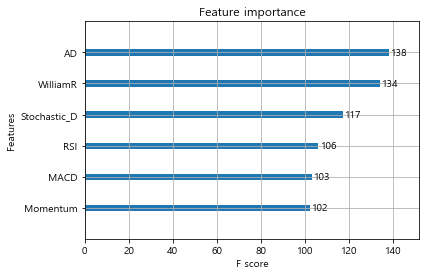

In [104]:
from numpy import loadtxt
from xgboost import  XGBClassifier
from xgboost import plot_importance
import xgboost

model = XGBClassifier()
model.fit(X_train[['Momentum','Stochastic_D', 'RSI','MACD','AD','WilliamR' ]],Y_train)
plot_importance(model)
# plt.show()
a = model.predict(X_test[['Momentum','Stochastic_D', 'RSI','MACD','AD','WilliamR' ]])
print(metrics.accuracy_score(a,Y_test))
t = metrics.confusion_matrix(Y_test,a)
print(t,t[1,1]/t[:,1].sum())

In [105]:
acc = []
pre = []
for i in [2,3,4,5,6,7]:
    for k in [0,2,4,6,8,10,15,20]:
        for j in [0,1,2,4,6,8,10,20,30]:
            model = XGBClassifier(max_depth=i, gamma=k,min_child_weight = j)
            model.fit(X_train[['Momentum','Stochastic_D', 'RSI','MACD','AD','WilliamR' ]] ,Y_train)
            a = model.predict(X_test[['Momentum','Stochastic_D', 'RSI','MACD','AD','WilliamR' ]])
            t = metrics.confusion_matrix(Y_test,a)
            print('max_depth:{} , gamma: {},  min_child_weight:{} '.format(i,k,j),'\n',t,'\n','pre',t[1,1]/t[:,1].sum(),'\n','acc',
                  metrics.accuracy_score(a,Y_test),'\n','**************************************')
            acc.append(metrics.accuracy_score(a,Y_test))
            pre.append(t[1,1]/t[:,1].sum())

max_depth:2 , gamma: 0,  min_child_weight:0  
 [[214  22]
 [177  27]] 
 pre 0.5510204081632653 
 acc 0.5477272727272727 
 **************************************
max_depth:2 , gamma: 0,  min_child_weight:1  
 [[214  22]
 [177  27]] 
 pre 0.5510204081632653 
 acc 0.5477272727272727 
 **************************************
max_depth:2 , gamma: 0,  min_child_weight:2  
 [[214  22]
 [177  27]] 
 pre 0.5510204081632653 
 acc 0.5477272727272727 
 **************************************
max_depth:2 , gamma: 0,  min_child_weight:4  
 [[214  22]
 [177  27]] 
 pre 0.5510204081632653 
 acc 0.5477272727272727 
 **************************************
max_depth:2 , gamma: 0,  min_child_weight:6  
 [[214  22]
 [177  27]] 
 pre 0.5510204081632653 
 acc 0.5477272727272727 
 **************************************
max_depth:2 , gamma: 0,  min_child_weight:8  
 [[214  22]
 [177  27]] 
 pre 0.5510204081632653 
 acc 0.5477272727272727 
 **************************************
max_depth:2 , gamma: 0,  min_child

max_depth:2 , gamma: 15,  min_child_weight:2  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:2 , gamma: 15,  min_child_weight:4  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:2 , gamma: 15,  min_child_weight:6  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:2 , gamma: 15,  min_child_weight:8  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:2 , gamma: 15,  min_child_weight:10  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:2 , gamma: 15,  min_child_weight:20  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:2 , gamma: 15,  min_child_weight:30  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 *******

max_depth:3 , gamma: 8,  min_child_weight:6  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:3 , gamma: 8,  min_child_weight:8  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:3 , gamma: 8,  min_child_weight:10  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:3 , gamma: 8,  min_child_weight:20  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:3 , gamma: 8,  min_child_weight:30  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:3 , gamma: 10,  min_child_weight:0  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:3 , gamma: 10,  min_child_weight:1  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 ************

max_depth:4 , gamma: 4,  min_child_weight:10  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:4 , gamma: 4,  min_child_weight:20  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:4 , gamma: 4,  min_child_weight:30  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:4 , gamma: 6,  min_child_weight:0  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:4 , gamma: 6,  min_child_weight:1  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:4 , gamma: 6,  min_child_weight:2  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:4 , gamma: 6,  min_child_weight:4  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************

max_depth:5 , gamma: 0,  min_child_weight:30  
 [[200  36]
 [171  33]] 
 pre 0.4782608695652174 
 acc 0.5295454545454545 
 **************************************
max_depth:5 , gamma: 2,  min_child_weight:0  
 [[218  18]
 [180  24]] 
 pre 0.5714285714285714 
 acc 0.55 
 **************************************
max_depth:5 , gamma: 2,  min_child_weight:1  
 [[218  18]
 [180  24]] 
 pre 0.5714285714285714 
 acc 0.55 
 **************************************
max_depth:5 , gamma: 2,  min_child_weight:2  
 [[218  18]
 [180  24]] 
 pre 0.5714285714285714 
 acc 0.55 
 **************************************
max_depth:5 , gamma: 2,  min_child_weight:4  
 [[218  18]
 [180  24]] 
 pre 0.5714285714285714 
 acc 0.55 
 **************************************
max_depth:5 , gamma: 2,  min_child_weight:6  
 [[218  18]
 [180  24]] 
 pre 0.5714285714285714 
 acc 0.55 
 **************************************
max_depth:5 , gamma: 2,  min_child_weight:8  
 [[218  18]
 [180  24]] 
 pre 0.5714285714285714 
 acc 0.

max_depth:5 , gamma: 20,  min_child_weight:1  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:5 , gamma: 20,  min_child_weight:2  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:5 , gamma: 20,  min_child_weight:4  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:5 , gamma: 20,  min_child_weight:6  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:5 , gamma: 20,  min_child_weight:8  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:5 , gamma: 20,  min_child_weight:10  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:5 , gamma: 20,  min_child_weight:20  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 ********

max_depth:6 , gamma: 10,  min_child_weight:6  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:6 , gamma: 10,  min_child_weight:8  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:6 , gamma: 10,  min_child_weight:10  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:6 , gamma: 10,  min_child_weight:20  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:6 , gamma: 10,  min_child_weight:30  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:6 , gamma: 15,  min_child_weight:0  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:6 , gamma: 15,  min_child_weight:1  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 *******

max_depth:7 , gamma: 6,  min_child_weight:10  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:7 , gamma: 6,  min_child_weight:20  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:7 , gamma: 6,  min_child_weight:30  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:7 , gamma: 8,  min_child_weight:0  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:7 , gamma: 8,  min_child_weight:1  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:7 , gamma: 8,  min_child_weight:2  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************************************
max_depth:7 , gamma: 8,  min_child_weight:4  
 [[236   0]
 [204   0]] 
 pre nan 
 acc 0.5363636363636364 
 **************

In [56]:
max(acc)

0.5409090909090909

In [61]:
pre.sort()

In [62]:
pre

[0.55,
 0.5740740740740741,
 0.5740740740740741,
 0.5740740740740741,
 0.5740740740740741,
 0.5740740740740741,
 0.5740740740740741,
 0.5740740740740741,
 0.6041666666666666,
 0.6756756756756757,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.5740740740740741,
 0.576271186440678,
 0.576271186440678,
 0.576271186440678,
 0.576271186440678,
 0.576271186440678,
 0.5849056603773585,
 0.62,
 0.62,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
